# chap19 오토인코더

In [8]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,\
                                    UpSampling2D, Flatten, Reshape
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# mnist 데이터 불러 옴
(x_train, _), (x_test, _) = mnist.load_data()

# 데이터의 shape 변환 및 정규화
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

In [ ]:
# 생성자 모델 생성
autoencoder = Sequential()

# 인코딩 부분 설계  -> (conv, maxplooling) 2 번,  conv -> 7 * 7 * 8
autoencoder.add(Conv2D(16, kernel_size=3, padding='same',
                      input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same',
                      strides=2))   # 4 * 4 * 8

#  디코딩 부분 설계 -> 28 * 28 * 1
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())   # 8 * 8 * 8
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())     # 16 * 16 * 8
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu')) #  14 * 14 * 8
autoencoder.add(UpSampling2D())   # 28 * 28 * 16
autoencoder.add(Conv2D(1, kernel_size=3, activation='sigmoid', padding='same'))

autoencoder.summary()

Epoch 1/50
469/469 [==============================] - 26s 53ms/step - loss: 0.2059 - val_loss: 0.1323
Epoch 2/50
469/469 [==============================] - 26s 55ms/step - loss: 0.1233 - val_loss: 0.1150
Epoch 3/50
469/469 [==============================] - 27s 57ms/step - loss: 0.1124 - val_loss: 0.1080
Epoch 4/50
469/469 [==============================] - 27s 57ms/step - loss: 0.1074 - val_loss: 0.1043
Epoch 5/50
469/469 [==============================] - 26s 56ms/step - loss: 0.1045 - val_loss: 0.1021
Epoch 6/50
469/469 [==============================] - 28s 59ms/step - loss: 0.1024 - val_loss: 0.1001
Epoch 7/50
469/469 [==============================] - 27s 58ms/step - loss: 0.1007 - val_loss: 0.0985
Epoch 8/50
469/469 [==============================] - 27s 58ms/step - loss: 0.0991 - val_loss: 0.0971
Epoch 9/50
469/469 [==============================] - 27s 58ms/step - loss: 0.0978 - val_loss: 0.0958
Epoch 10/50
469/469 [==============================] - 27s 57ms/step - loss: 0.096

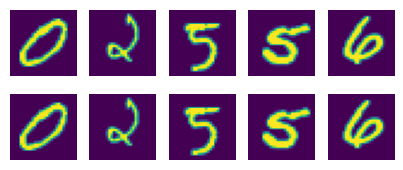

In [14]:
# 컴파일 및 실행
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
# optimiser=tf.optimizers.Adam(learning_rate=0.001)
autoencoder.fit(x_train, x_train, epochs=50, 
                batch_size=128, validation_data=(x_test, x_test))

# 학습된 결과 출력
# 오토인코더로 기존의 이미지의 특성을 살려 새로운 이미지 생성
predict_imgs = autoencoder.predict(x_test)  
test_idx = np.random.randint(x_test.shape[0], size=5) # test idx를 임의로 5개 선정

plt.figure(figsize=(7,2))
for i, image_idx in enumerate(test_idx):
    ax = plt.subplot(2, 7, i+1)   # 실제 이미지 출력
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
    
    ax = plt.subplot(2, 7, 7+i+1)
    plt.imshow(predict_imgs[image_idx].reshape(28,28))
    plt.imshow(x_test[image_idx].reshape(28,28))
    ax.axis('off')
plt.show()